In [143]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train=pd.read_csv('titanic.csv')
test=pd.read_csv('test.csv')

In [44]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
train.drop(['Cabin'],axis=1,inplace =True)
test.drop(['Cabin'],axis=1,inplace =True)

In [48]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
train['Embarked'].fillna('S',inplace=True)

In [50]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [52]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [53]:
gen_age

array([24, 37, 35, 42, 16, 21, 36, 38, 36, 39, 25, 30, 18, 24, 19, 43, 29,
       34, 30, 27, 26, 23, 36, 22, 20, 30, 25, 42, 18, 17, 36, 40, 27, 37,
       22, 32, 39, 40, 15, 16, 24, 29, 16, 41, 18, 33, 29, 31, 27, 28, 16,
       18, 16, 41, 34, 29, 34, 38, 16, 38, 24, 39, 39, 29, 32, 30, 41, 37,
       40, 15, 22, 24, 33, 24, 39, 29, 31, 34, 16, 24, 35, 41, 15, 28, 28,
       41, 23, 23, 29, 22, 33, 17, 24, 41, 37, 27, 32, 36, 40, 33, 33, 26,
       41, 16, 33, 34, 19, 25, 40, 42, 22, 27, 22, 24, 43, 34, 29, 29, 22,
       41, 27, 17, 35, 19, 29, 20, 38, 15, 24, 16, 38, 31, 25, 15, 31, 33,
       15, 31, 33, 26, 22, 32, 23, 32, 35, 16, 23, 30, 26, 34, 33, 20, 28,
       40, 36, 40, 42, 29, 15, 19, 36, 15, 39, 30, 22, 24, 36, 17, 17, 17,
       37, 25, 36, 28, 29, 20, 33])

In [54]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [57]:
test['Age'][np.isnan(test['Age'])]=gen_age1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [60]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [61]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


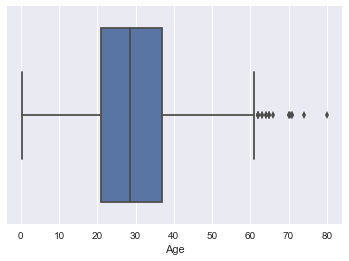

In [62]:
sns.boxplot(train['Age'])

In [63]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [64]:
passengerid=test['PassengerId'].values

In [65]:
train.drop(['PassengerId'],axis=1,inplace =True)
train.drop(['Ticket'],axis=1,inplace =True)
test.drop(['PassengerId'],axis=1,inplace =True)
test.drop(['Ticket'],axis=1,inplace =True)

In [66]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
train[train['Fare']>200]['Survived'].value_counts()

1    14
0     6
Name: Survived, dtype: int64

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


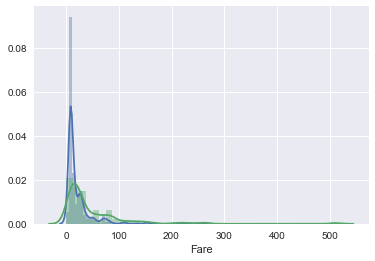

In [71]:
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [73]:
train['Name']
#Do not drop

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [74]:
train.drop(['Name'],axis=1,inplace =True)
test.drop(['Name'],axis=1,inplace =True)

In [75]:
train['Family']=train['SibSp'].values+train['Parch'].values+1
test['Family']=test['SibSp'].values+test['Parch'].values+1

In [76]:
train.drop(['SibSp'],axis=1,inplace =True)
test.drop(['SibSp'],axis=1,inplace =True)
train.drop(['Parch'],axis=1,inplace =True)
test.drop(['Parch'],axis=1,inplace =True)

In [77]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [80]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [81]:
train[['Family','Survived']].groupby('Family').mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [83]:
def family_size(number):
    if(number==1):
        return "alone"
    elif(number>1 and number <5):
        return "small"
    else:
        return "huge"

In [84]:
family_size(5)

'huge'

In [86]:
train['family_size']=train['Family'].apply(family_size)

In [87]:
test['family_size']=test['Family'].apply(family_size)

In [88]:
train.drop(['Family'],axis=1,inplace =True)
test.drop(['Family'],axis=1,inplace =True)

In [89]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [91]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [92]:
train.drop(['Survived'],axis=1,inplace =True)

In [93]:
train

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,S,small
1,1,female,38.0,71.2833,C,small
2,3,female,26.0,7.9250,S,alone
3,1,female,35.0,53.1000,S,small
4,3,male,35.0,8.0500,S,alone
5,3,male,24.0,8.4583,Q,alone
6,1,male,54.0,51.8625,S,alone
7,3,male,2.0,21.0750,S,huge
8,3,female,27.0,11.1333,S,small
9,2,female,14.0,30.0708,C,small


In [94]:
train.shape

(891, 6)

In [95]:
test.shape

(418, 6)

In [102]:
final=train.append(test)

In [103]:
final.shape

(1309, 6)

In [104]:
final

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,S,small
1,1,female,38.0,71.2833,C,small
2,3,female,26.0,7.9250,S,alone
3,1,female,35.0,53.1000,S,small
4,3,male,35.0,8.0500,S,alone
5,3,male,24.0,8.4583,Q,alone
6,1,male,54.0,51.8625,S,alone
7,3,male,2.0,21.0750,S,huge
8,3,female,27.0,11.1333,S,small
9,2,female,14.0,30.0708,C,small


In [106]:
final=pd.get_dummies(final,columns=['Pclass','Embarked','Sex','family_size'],drop_first=True)

In [107]:
final

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,family_size_huge,family_size_small
0,22.0,7.2500,0,1,0,1,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,1,0,0,0
3,35.0,53.1000,0,0,0,1,0,0,1
4,35.0,8.0500,0,1,0,1,1,0,0
5,24.0,8.4583,0,1,1,0,1,0,0
6,54.0,51.8625,0,0,0,1,1,0,0
7,2.0,21.0750,0,1,0,1,1,1,0
8,27.0,11.1333,0,1,0,1,0,0,1
9,14.0,30.0708,1,0,0,0,0,0,1


In [108]:
xf=final.tail(418).values

In [109]:
xf

array([[ 34.5   ,   7.8292,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 47.    ,   7.    ,   0.    , ...,   0.    ,   0.    ,   1.    ],
       [ 62.    ,   9.6875,   1.    , ...,   1.    ,   0.    ,   0.    ],
       ..., 
       [ 38.5   ,   7.25  ,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 18.    ,   8.05  ,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 28.    ,  22.3583,   0.    , ...,   1.    ,   0.    ,   1.    ]])

In [110]:
final.head(891)

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,family_size_huge,family_size_small
0,22.0,7.2500,0,1,0,1,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,1,0,0,0
3,35.0,53.1000,0,0,0,1,0,0,1
4,35.0,8.0500,0,1,0,1,1,0,0
5,24.0,8.4583,0,1,1,0,1,0,0
6,54.0,51.8625,0,0,0,1,1,0,0
7,2.0,21.0750,0,1,0,1,1,1,0
8,27.0,11.1333,0,1,0,1,0,0,1
9,14.0,30.0708,1,0,0,0,0,0,1


In [111]:
x=final.head(891).values

In [112]:
x.shape

(891, 9)

In [113]:
y.shape

(891,)

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [116]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [117]:
y_pred=clf.predict(x_test)

In [118]:
y_pred.shape

(179,)

In [119]:
y_test.shape

(179,)

In [121]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(y_test,y_pred)

0.79329608938547491

In [127]:
passengerid

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [128]:
xf

array([[ 34.5   ,   7.8292,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 47.    ,   7.    ,   0.    , ...,   0.    ,   0.    ,   1.    ],
       [ 62.    ,   9.6875,   1.    , ...,   1.    ,   0.    ,   0.    ],
       ..., 
       [ 38.5   ,   7.25  ,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 18.    ,   8.05  ,   0.    , ...,   1.    ,   0.    ,   0.    ],
       [ 28.    ,  22.3583,   0.    , ...,   1.    ,   0.    ,   1.    ]])

In [129]:
yf=clf.predict(xf)

In [130]:
yf.shape

(418,)

In [134]:
submission=pd.DataFrame()

In [135]:
submission['Passenger']=passengerid
submission['Survived']=yf

In [139]:
submission

,Passenger,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [142]:
submission.to_csv('submission.csv',index=False)